
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


In [4]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

In [5]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [6]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Diversidades'], dtype=object)

In [7]:
df[['profile_g', 'salary_monthly_NETO']]

,profile_g,salary_monthly_NETO
0,Varón cis,245000.0
1,Varón cis,850000.0
2,Varón cis,115000.0
3,Varón cis,0.0
4,Varón cis,125000.0
...,...,...
5353,Mujer cis,214.8
5354,Mujer cis,93000.0
5355,Mujer cis,190900.0
5356,Varón cis,297750.0


In [8]:
df[['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe() #Nota: Hay que fijarnos en la mediana para que no usar un valor tironeado por los outliers (media)

salary_monthly_NETO                                               \
                           count           mean            std  min       25%   
profile_g                                                                       
Diversidades                98.0  261873.543041  356719.368150  0.0   90500.0   
Mujer cis                  929.0  188903.430667  184912.713803  0.0   91000.0   
Varón cis                 4331.0  296252.343889  433193.328154  0.0  125000.0   

                                              
                   50%       75%         max  
profile_g                                     
Diversidades  174448.5  262250.0   1950000.0  
Mujer cis     160000.0  237003.0   1878500.0  
Varón cis     212146.0  307988.0  15000000.0

In [9]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO                                        \
                           count           mean            std     min   
profile_g                                                                
Diversidades                85.0  301914.321765  367031.242344  2800.0   
Mujer cis                  806.0  217708.858077  182050.554847  1400.0   
Varón cis                 3975.0  322777.029197  442612.347688  1100.0   

                                                         
                   25%       50%        75%         max  
profile_g                                                
Diversidades  125000.0  190000.0  280000.00   1950000.0  
Mujer cis     116000.0  180000.0  248193.75   1878500.0  
Varón cis     147106.5  225000.0  322827.50  15000000.0

In [10]:
alpha = 0.05

In [11]:
is_man = df.profile_g == 'Varón cis' #Lista de booleanos

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO #Sueldos de varones cis
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO #Sueldos de mujeres cis y diversidades

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [12]:
media_groupA= groupA.mean()
media_groupB= groupB.mean()
diff_means = media_groupA - media_groupB
print(diff_means)

97035.10219411727


In [13]:
groupA.describe().apply(lambda s: '{0:.2f}'.format(s))

count        3975.00
mean       322777.03
std        442612.35
min          1100.00
25%        147106.50
50%        225000.00
75%        322827.50
max      15000000.00
Name: salary_monthly_NETO, dtype: object

In [14]:
groupB.describe().apply(lambda s: '{0:.2f}'.format(s))

count        891.00
mean      225741.93
std       208096.35
min         1400.00
25%       116750.00
50%       180000.00
75%       250000.00
max      1950000.00
Name: salary_monthly_NETO, dtype: object

---

*Como ambas variables aleatorias tienen desviaciones estándar distintas aplicamos la siguiente inecuación:*

$(\overline{x}_1 - \overline{x}_2) - t_{{\frac{\alpha}{2}}v} \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}} < \mu_1 - \mu_2 < (\overline{x}_1 - \overline{x}_2) +  t_{{\frac{\alpha}{2}}v} \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
 $

*Los grados de libertad (v) se obtienen de la siguiente manera:*

$ v = \frac{(\frac{s^2 _1}{n_1} + \frac{s^2 _2}{n_2})^2}{\frac{(\frac{s^2 _1}{n_1})^2}{n_1-1} + \frac{(\frac{s^2 _2}{n_2})^2}{n_2-1}} $

*A continuación calculamos los grados de libertad*

---


In [15]:
degrees_freedom = (((groupA.std())**2 / (groupA.count()) + ((groupB.std())**2 / (groupB.count())))**2) / (((groupA.std())**2 / (groupA.count()))**2 / (groupA.count()-1) + (((groupB.std())**2 / (groupB.count()))**2 / (groupB.count()-1)))
degrees_freedom #Habra alguna libreria que lo haga solo? Igual esta re bueno hacerlo

2934.414828228228

---

*El valor crítico es $t_{0975} = 1.96$*

*Y obtenemos los límites inferior y superior*

---


In [16]:
t_0975 = 1.96

In [17]:
diff_means_lower = diff_means - t_0975 * np.sqrt((groupA.std())**2 / groupA.count() + (groupB.std())**2 / groupB.count())
diff_means_lower

77643.36878721412

In [18]:
diff_means_upper = diff_means + t_0975 * np.sqrt((groupA.std())**2 / groupA.count() + (groupB.std())**2 / groupB.count())
diff_means_upper

116426.83560102042

---

*El intervalo de confianza se relaciona con el test de hipótesis porque éste, es el rango en el cuál la probabilidad de que un valor muestral sea distinto de lo propuesto en la hipótesis nula $H_{0}$, puede ser explicado meramente por el efecto del azar.*

---

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


---

*El test de hipótesis para verificar si existen diferencias en la distribución de salarios entre varones y no varones se debe plantear de forma tal que se  comparen las medias de estas dos subpoblaciones, comprobando si existen igualdad de medias o no.*

*La hipótesis nula $H_0$ es la siguiente:*

$H_0: \mu_A = \mu_B$


*Siendo la hipótesis alternativa*

$H_1: \mu_A \neq \mu_B$

*El estadístico que se debe utilizar para este test de hipótesis bajo $H_0$ es*

$ t= \frac{\Delta \overline{X}}{S_\Delta\overline{X}} = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{{S^2_\overline{X_1}} + {S^2_\overline{X_2}}}} $

*Este anterior estadístico es usado en el test de Welch. El mismo se distribuye T de Student con v grados de libertad, siendo v:*

$ v \approx \frac{(\frac{s^2_1}{N_1} + \frac{s^2_2}{N_2})^2}{\frac{s^4_1}{N^2_1  v_1} + \frac{s^4_2}{N^2_2  v_2}}$

---



### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [19]:
import scipy
scipy.stats.ttest_ind(groupA, groupB, equal_var=False, nan_policy='omit', permutations=None, random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=9.807725607075726, pvalue=2.2923222141073007e-22)

---

*Trabajando con un nivel de significancia del 5% ($α$ = 0.05) rechazamos $H_0$ de igualdad de medias. Existe evidencia estadística suficiente para suponer que las dos subpoblaciones siguen distinta distribución. Particularmente, las personas que declaran como género "Varón Cisgénero" ganan en promedio un sueldo más elevado que quienes declaran no ser "Varones Cisgénero".*

---

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

### Tamaño de muestra necesario para una potencia estadística de 0.80:

In [20]:
from statsmodels.stats.power import tt_ind_solve_power

In [21]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.80

In [22]:
min_obs_groupA = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
min_obs_groupA

198.72009534639577

In [23]:
min_obs_groupB = min_obs_groupA*ratio 
min_obs_groupB

44.54329684368267

### Tamaño de muestra necesario para una potencia estadística de 0.90:



In [24]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.90

In [25]:
min_obs_groupA = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
min_obs_groupA

265.49239170136235

In [26]:
min_obs_groupB = min_obs_groupA*ratio 
min_obs_groupB

59.510370064380844

### Tamaño de muestra necesario para una potencia estadística de 0.95:

In [27]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.95

In [28]:
min_obs_groupA = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
min_obs_groupA

327.9639162815211

In [29]:
min_obs_groupB = min_obs_groupA*ratio 
min_obs_groupB

73.51342123442397

---

*El test de hipótesis que hemos realizado anteriormente tiene una potencia estadística de 0.95 trabajando con un nivel de significancia estadística de 5%. Esto se puede interpretar como: la probabilidad de cometer un error de tipo II (no rechazar hipótesis nula siendo esta falsa) es de 0.05.*

---


In [30]:
print(len(groupA))

3975


In [31]:
print(len(groupB))

891


---

*El tamaño de nuestra muestra en ambos grupos es lo suficientemente grande como para representar la tendencia general. 
Sin embargo, no podemos utilizar esta prueba estadística como prueba judicial en contra de una empresa XX en particular. Para ello deberíamos demostrar que la empresa discrimina sistemáticamente favoreciendo al grupo A en detrimento del grupo B.*

*Si queremos llevar a cabo un test de hipótesis para probar esto, deberíamos tomar las observaciones pertenecientes a las personas que trabajan en la empresa XX, dividirlas en dos grupos y contrastar la diferencia de medias (verificando que el número de observaciones sea lo suficientemente grande para la potencia del test que queremos alcanzar).*

*Aún así, en caso de que exista evidencia estadística que indique diferencias de salarios entre ambos grupos, no podemos concluir contundentemente que tal discrepancia se deba a una política discriminatoria por parte de la empresa XX.*

*Pero supongamos que el juez toma como suficiente prueba incriminatoria únicamente la dócima de hipótesis que acabamos de plantear, entonces existe la probabilidad de que se esté declarando como culpable a alguien inocente.*

---

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [32]:
#contamos los < 40 años
df[(df['profile_age']<40)].count()
#ponerlo mas prolijo

work_country                                                                       4254
work_province                                                                      4254
work_dedication                                                                    4254
work_contract_type                                                                 4254
salary_monthly_BRUTO                                                               4254
salary_monthly_NETO                                                                4254
numero                                                                             4254
salary_in_usd                                                                      1376
salary_last_dollar_value                                                            870
salary_pay_cripto                                                                   145
salary_%_cripto                                                                     626
salary_has_bonus                

In [33]:
#Sacar el % de cuantos son los U40 respecto al df original 

In [34]:
#dataframe menores de 40 años
df_Under40_mask=df['profile_age']<40
df_Under40=df[df_Under40_mask]
df_Under40.shape

(4254, 45)

In [35]:
#dataframe MAYORES de 40 años
df_Above40_mask=df['profile_age']>=40
df_Above40=df[df_Above40_mask]
df_Above40.shape

(1104, 45)

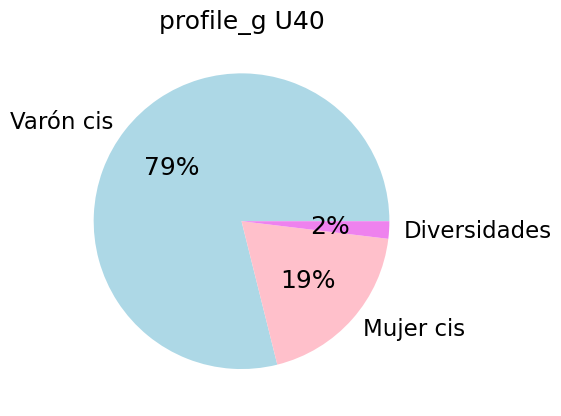

In [36]:
#pie chart gender U40
data = df_Under40['profile_g'].value_counts()
keys = ['Varón cis', 'Mujer cis', 'Diversidades']
plt.pie(data, labels=keys, colors=['lightblue','pink', 'violet'], autopct='%.0f%%')
plt.title('profile_g U40')
plt.show()
#ver los colores

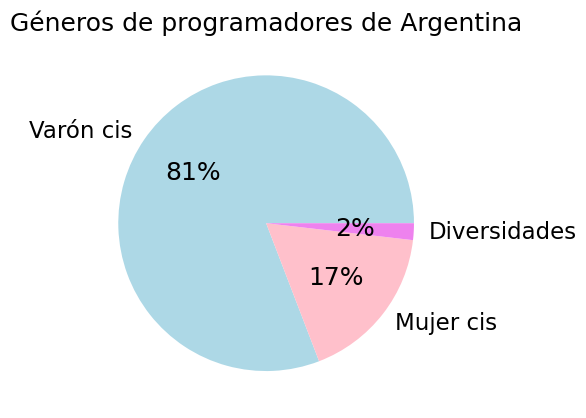

In [37]:
#pie chart gender ORIGINAL
data = df['profile_g'].value_counts()
keys = ['Varón cis', 'Mujer cis', 'Diversidades']
plt.pie(data, labels=keys, colors=['lightblue','pink', 'violet'], autopct='%.0f%%')
plt.title('Géneros de programadores de Argentina')
plt.show()
#ver los colores

#cambian los %, hay algo generacional??? hay mas mujeres y menos hombes, diversidades sigue igual

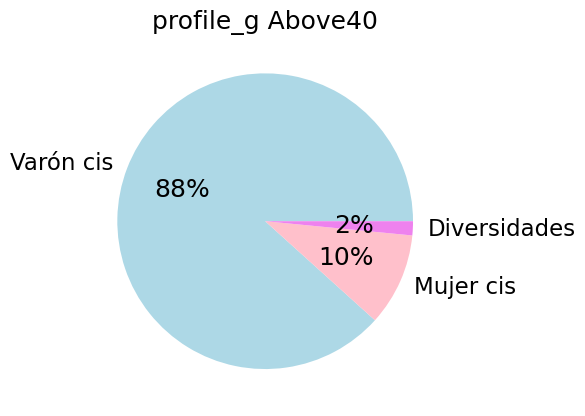

In [38]:
#pie chart gender Above40
data = df_Above40['profile_g'].value_counts()
keys = ['Varón cis', 'Mujer cis', 'Diversidades']
plt.pie(data, labels=keys, colors=['lightblue','pink', 'violet'], autopct='%.0f%%')
plt.title('profile_g Above40')
plt.show()
#ver los colores

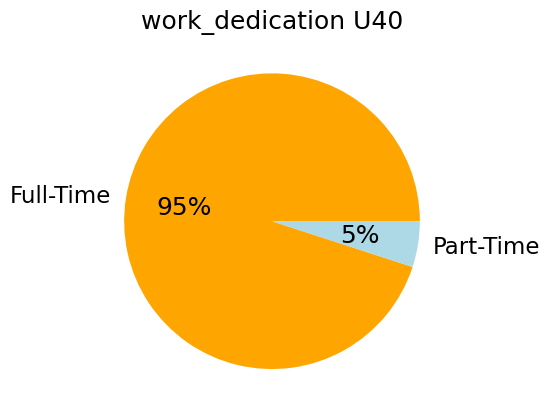

In [39]:
#piechart workdedication U40
data = df_Under40['work_dedication'].value_counts()
keys = ['Full-Time', 'Part-Time']
plt.pie(data, labels=keys, colors=['orange', 'lightblue'], autopct='%.0f%%')
plt.title('work_dedication U40')
plt.show()
#ver los colores

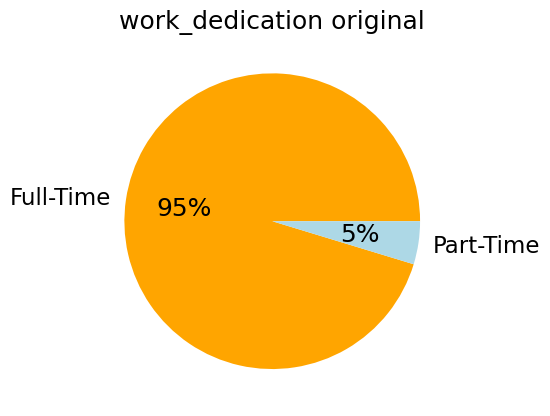

In [40]:
#piechart workdedication ORIGINAL
data = df['work_dedication'].value_counts()
keys = ['Full-Time', 'Part-Time']
plt.pie(data, labels=keys, colors=['orange', 'lightblue'], autopct='%.0f%%')
plt.title('work_dedication original')
plt.show()


#Sigue lo mismo que el U40
#no hay diferencias, aporta algo ponerlo??

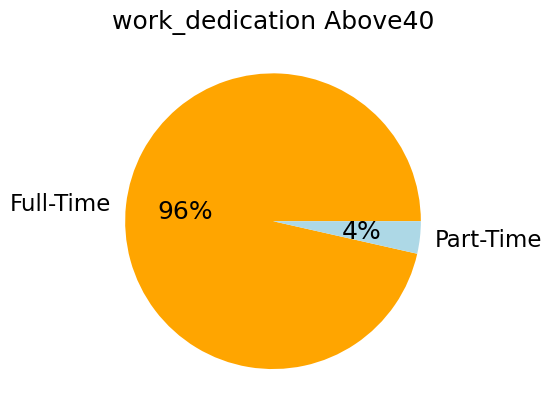

In [41]:
data = df_Above40['work_dedication'].value_counts()
keys = ['Full-Time', 'Part-Time']
plt.pie(data, labels=keys, colors=['orange', 'lightblue'], autopct='%.0f%%')
plt.title('work_dedication Above40')
plt.show()

In [42]:
# ver los tipo de trabajo
# podramos unificar?
# sirve separar?
# los que no son remoto son prescencial?
df_Under40.work_work_modality.unique()

array(['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial'],
      dtype=object)

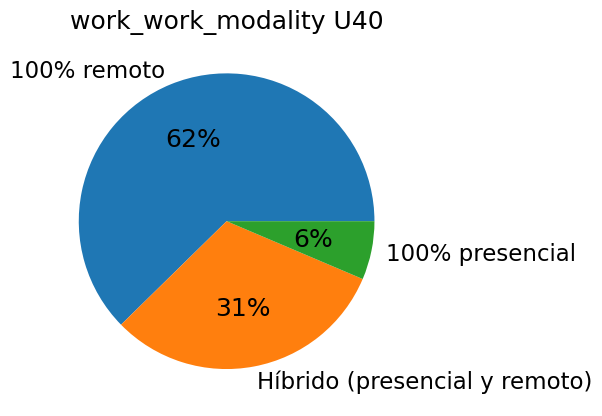

In [43]:
#piechart work_contract_type U40
data = df_Under40['work_work_modality'].value_counts()
keys = ['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('work_work_modality U40')
plt.show()

#sirve graficar esto?

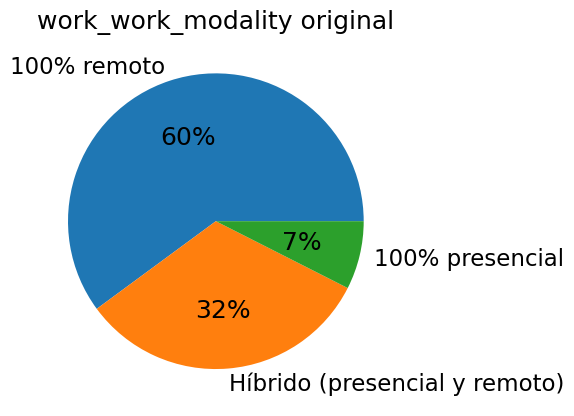

In [44]:
#piechart work_contract_type ORIGINAL
data = df['work_work_modality'].value_counts()
keys = ['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('work_work_modality original')
plt.show()

#sirve graficar esto?

#Vemos los %
# 

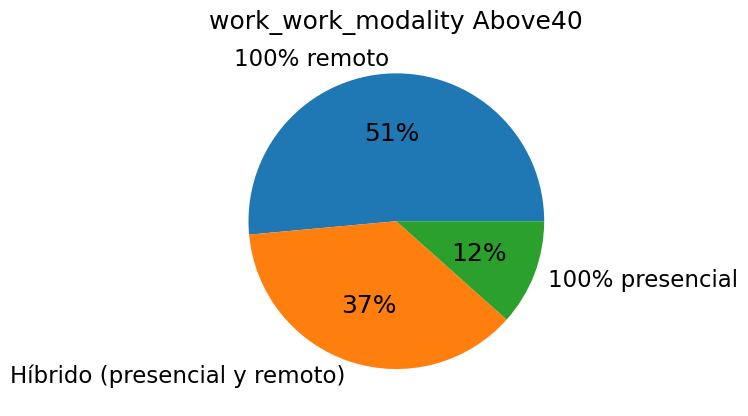

In [45]:
#piechart work_contract_type Above40
data = df_Above40['work_work_modality'].value_counts()
keys = ['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('work_work_modality Above40')
plt.show()

In [46]:
df_Under40.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

In [47]:
#dataframe menores de 40 y Hombres

df_Under40Male = df.loc[(df['profile_age']<40) & (df['profile_g']=='Varón cis')]
df_Under40Male.shape


(3356, 45)

In [48]:
df_Under40Male.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

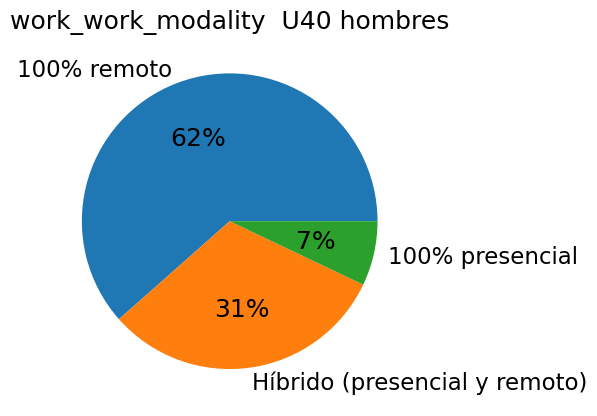

In [49]:
#piechart work_contract_type Above40
data = df_Under40Male['work_work_modality'].value_counts()
keys = ['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('work_work_modality'+'  U40 hombres')
plt.show()

In [50]:
df_Under40Male['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       3356.00
mean      284248.90
std       370405.00
min            0.00
25%       120000.00
50%       200000.00
75%       298250.00
max      8000000.00
Name: salary_monthly_NETO, dtype: object

In [51]:
#dataframe menores de 40 y mujeres

df_Under40Female = df.loc[(df['profile_age']<40) & (df['profile_g']=='Mujer cis')]
df_Under40Female.shape


(817, 45)

In [52]:
df_Under40Female['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count        817.00
mean      186938.63
std       187638.97
min            0.00
25%        90000.00
50%       155000.00
75%       232000.00
max      1878500.00
Name: salary_monthly_NETO, dtype: object

In [53]:
#dataframe menores de 40 y diversidad

df_Under40Diversidad = df.loc[(df['profile_age']<40) & (df['profile_g']=='Diversidades')]
df_Under40Diversidad.shape

(81, 45)

In [54]:
df_Under40Diversidad['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count         81.00
mean      273779.92
std       385296.37
min            0.00
25%        90000.00
50%       170000.00
75%       267088.00
max      1950000.00
Name: salary_monthly_NETO, dtype: object

In [55]:
#redondeado
df_Under40Diversidad['salary_monthly_NETO'].describe().round()

count         81.0
mean      273780.0
std       385296.0
min            0.0
25%        90000.0
50%       170000.0
75%       267088.0
max      1950000.0
Name: salary_monthly_NETO, dtype: float64